In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### Data preparation

In [78]:
n = 90
c = 3

y1 = np.ones((int(n/c),1), dtype=int)
y2 = np.ones((int(n/c),1), dtype=int)*2
y3 = np.ones((int(n/c),1), dtype=int)*3
y  = np.concatenate((y1,y2,y3), 0)
y  = y.squeeze()


x1 = np.random.randn(int(n/c),c) + \
     np.tile(np.linspace(-3,3,c), (int(n/c), 1))
x  = sorted(x1.flatten())
x  = np.float64(x)[:,np.newaxis]


hh = 2*(1**2)
t0 = np.random.randn(n,c)
e  = 0.1
l  = 100

xx = np.power(x,2)
K1 = np.tile(xx, (1,n))
K2 = np.tile(xx.T, (n,1)) 
K3 = 2*(x.dot(x.T))
K  = np.exp(-(K1+K2-K3)/hh)

phi1 = (np.eye(np.max(y)+1)[y])
phi = np.delete(phi1, 0, axis=1)

t = np.linalg.inv((K.T.dot(K) + l*np.eye(n))) @ (K.T @ phi)

##### Testing data 

In [64]:
N = 100
X = np.linspace(-5,5,N)[:,np.newaxis]
XX = X**2

KX1 = np.tile(XX, (1,n))
KX2 = np.tile(xx.T,(N,1))
KX3 = 2*X.dot(x.T)
KX = np.exp(-(KX1+KX2-KX3)/hh)

##### Plotting

In [34]:
C = KX@t
nn = np.tile(C.sum(1)[:,np.newaxis],(1,c))
CC = C/nn

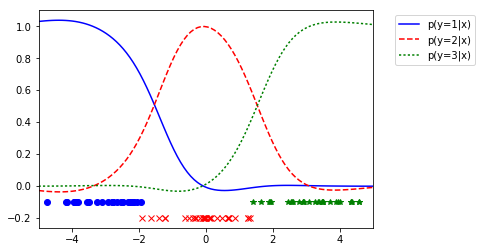

In [75]:
plt.plot(X,CC[:,0],'b-', label='p(y=1|x)')
plt.plot(X,CC[:,1],'r--', label='p(y=2|x)')
plt.plot(X,CC[:,2],'g:', label='p(y=3|x)')
plt.plot(x[y==1], -0.1*np.ones((30,1)),'bo')
plt.plot(x[y==2], -0.2*np.ones((30,1)),'rx')
plt.plot(x[y==3], -0.1*np.ones((30,1)),'g*')
plt.xlim(-5,5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.5)